In [1]:
%matplotlib notebook

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
#시도별 전출입 인구수.xlsx파일을 결측치는 0으로 대체,  
#첫번째 행을 header로 데이터 프레임 생성

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', fillna=0, header=0)

In [4]:
#데이터 프레임의 데이터중 누락값을 찾아서 앞 행의 동일컬럼의 값으로 채웁니다.

df = df.fillna(method='ffill')

In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)


In [6]:
#서울에서 '충청남도', '경상북도', '강원도' , '전라남도' 로 이동한 인구 데이터 값 선택 (1970~2018)

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'  ], col_years]
df_4 = df_4.transpose()

<IPython.core.display.Javascript object>


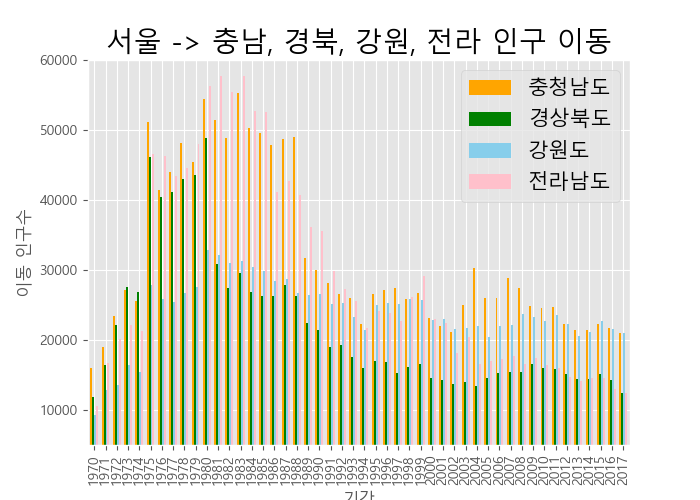

In [19]:
# 스타일 서식 지정

plt.style.use('ggplot') 

#데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨로 표시)
df_4.index=df_4.index.map(int)

#df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(7, 5))
#df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(7, 5))
df_4.plot(kind='bar', width=0.7, color=['orange', 'green', 'skyblue', 'pink'],
          figsize=(7, 5))

# 차트 제목 추가
plt.title('서울 -> 충남, 경북, 강원, 전라 인구 이동', size=20)

# 축이름 추가
plt.xlabel('기간', size=12)
plt.ylabel('이동 인구수', size = 12)
plt.legend(loc='best', fontsize=15)
plt.ylim(5000,60000) # kind='bar'에서 쓰였음

plt.show()

--- 

In [21]:
#시도별 전출입 인구수.xlsx파일을 결측치는 0으로 대체, 첫번째 행을 header로 데이터 프레임 생성
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', fillna=0, header=0)

In [22]:
#데이터 프레임의 데이터중 누락값을 찾아서 앞 행의 동일컬럼의 값으로 채웁니다.
df = df.fillna(method='ffill')

In [23]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [26]:
#서울에서 '충청남도', '경상북도', '강원도' , '전라남도' 로 이동한 인구 데이터 값 선택 (1970~2018)
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'  ], col_years]

df_4['합계'] = df_4.sum(axis=1)
df_total =  df_4[['합계']].sort_values(by='합계',  ascending=True)

<IPython.core.display.Javascript object>


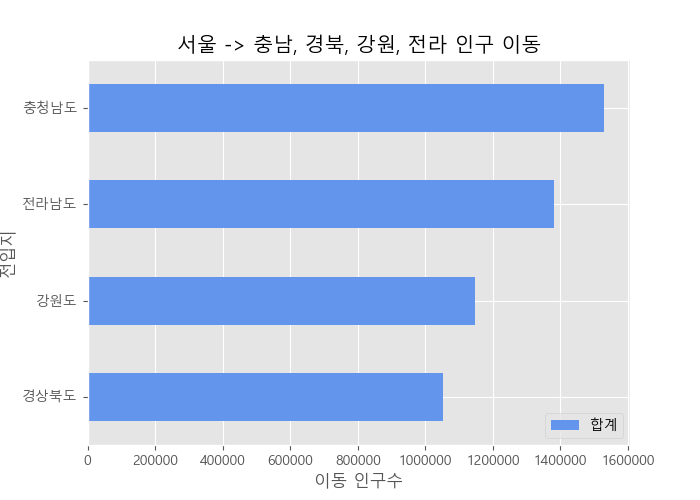

In [28]:
# 스타일 서식 지정
plt.style.use('ggplot')

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(7, 5))

 
# 차트 제목 추가
plt.title('서울 -> 충남, 경북, 강원, 전라 인구 이동')

# 축이름 추가
plt.xlabel('이동 인구수' )
plt.ylabel('전입지')

plt.show()